# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [111]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [19]:
data = pd.read_csv('geo.csv',sep=';',decimal=",")

In [20]:
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 4 columns):
Unnamed: 0       108806 non-null int64
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.3 MB


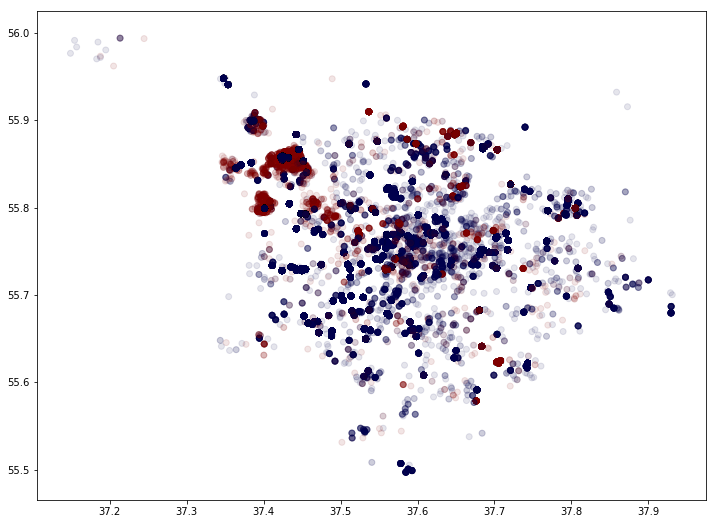

In [50]:
plt.figure(figsize=(12, 9))
plt.scatter(data.x, data.y, alpha=0.1,cmap=plt.cm.seismic,c=data.comment_class,label=data.comment_class)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['x','y']])

In [71]:
data_scaled=pd.concat([pd.DataFrame(data_scaled,columns=['x','y']),data.comment_class],axis=1)

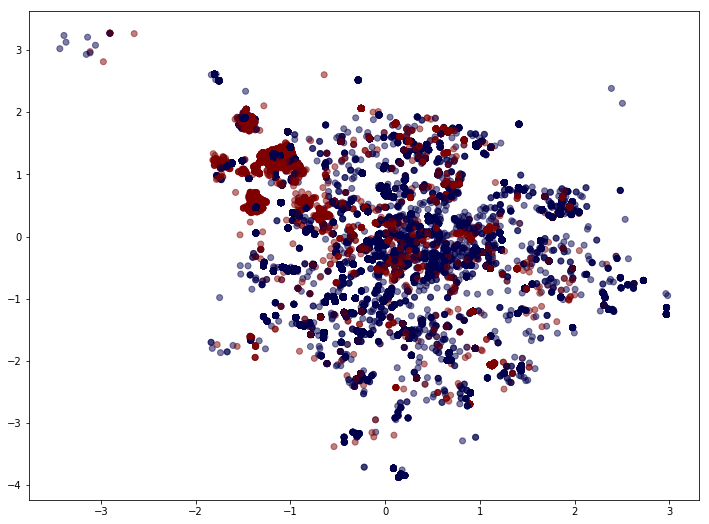

In [74]:
plt.figure(figsize=(12, 9))
plt.scatter(data_scaled.x, data_scaled.y,cmap=plt.cm.seismic,c=data_scaled.comment_class,alpha=0.5)

In [75]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [83]:
Kmeans=KMeans(n_clusters=12)
clusters = Kmeans.fit_predict(data_scaled)
#ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60)
#ax.set_title(get_descr(algorithm.__class__.__name__, y, clusters, X_scaled))

In [85]:
clusters

array([0, 0, 0, ..., 6, 8, 1])

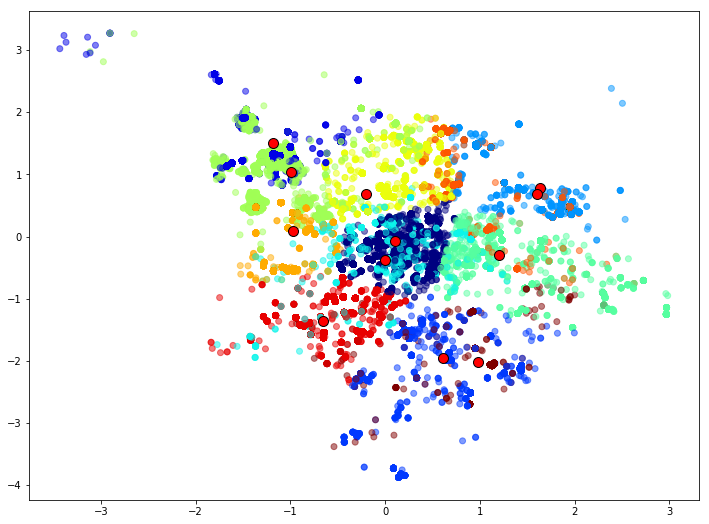

In [97]:
fig, axes = plt.subplots(1, 1, figsize=(12, 9))
axes.scatter(data_scaled.x, data_scaled.y,cmap=plt.cm.jet,c=clusters,alpha=0.5)
centers = Kmeans.cluster_centers_
axes.scatter(centers[:, 0], centers[:, 1], s=100,c='Red',edgecolors='black')

In [99]:
k_inertia = []
ks = range(1,12)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

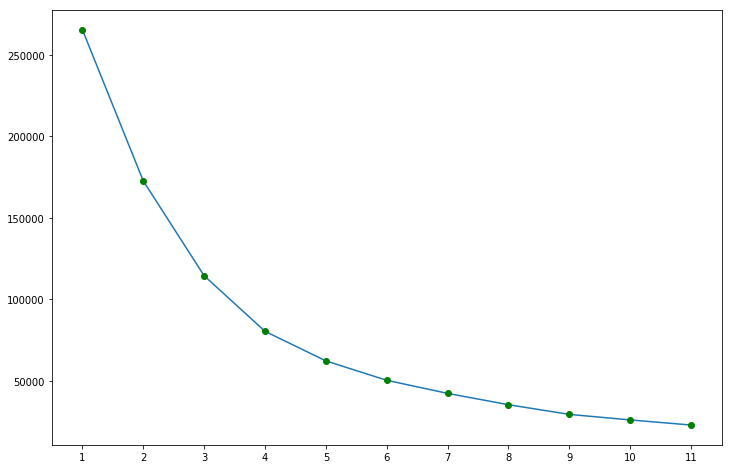

In [109]:
fig, axes = plt.subplots(1,1,figsize=(12,8))
axes.plot(ks, k_inertia)
axes.set_xticks(range(1,12))
axes.plot(ks, k_inertia,'go')

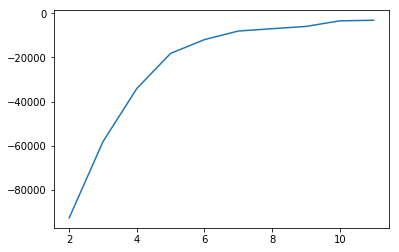

In [113]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

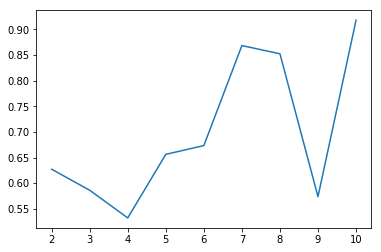

In [114]:
diff_r = diff[1:] / diff[:-1]b
plt.plot(ks[1:-1], diff_r)

In [115]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

4